## Multiple Linear Regression

In [16]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 : Read the Data Set

In [17]:
import pandas as pd 
df=pd.read_csv("50_Startups.csv")
df

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## step 2: Always Perform Basic Data Quality Checks

In [31]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [32]:
df.tail()

,RND,ADMIN,MKT,STATE,PROFIT
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [33]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [34]:
df.nunique()

RND       49
ADMIN     50
MKT       48
STATE      3
PROFIT    50
dtype: int64

In [35]:
df.duplicated().sum()

0

In [24]:
df.describe()

,RND,ADMIN,MKT,PROFIT
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Step 3 : Seperate X(RND, ADMIN, MKT) and Y(PROFIT)

### PROFIT ~ RND, ADMIN, MKT

PROFIT_pred = B0 + B1xRND + B2xADMIN + B3xMKT

X = [['RND','ADMIN','MKT']]
Y = [['PROFIT]]

In [39]:
X = df[['RND','ADMIN','MKT']]
Y = df[['PROFIT']]

In [40]:
X . head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [41]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94



### Step 4: Build a Linear Regression Model


In [45]:
from  sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

###In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [46]:
model.intercept_

array([50122.19298987])

In [47]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [49]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [50]:
Y.columns

Index(['PROFIT'], dtype='object')

### 
### PROFIT_pred = 50122.19 + 0.8057xRND - 0.0268xADMIN + 0.0272xMKT
## RND is having higest coefficient , Hence more i spend in RND more will be the profit


## Step 5: Evaluate the model


In [51]:
# R 2

model.score(X,Y)

0.9507459940683246

In [52]:
ypred = model.predict(X)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [53]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [54]:
from sklearn.metrics import  mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score


In [56]:
def evaluate_model(model, X, Y):
    ypred = model.predict(X)
    # Get all the metrics
    mse = mean_squared_error(Y, ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(Y, ypred)
    mape = mean_absolute_percentage_error(Y, ypred)
    r2 = r2_score(Y, ypred)
    # Print all above results
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE) : {rmse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Absolute Percentage Error (MAPE) : {mape*100:.2f} %')
    print(f'R2 score : {r2:.4f}')

In [57]:
evaluate_model(model, X, Y)

Mean Squared Error (MSE): 78417126.02
Root Mean Squared Error (RMSE) : 8855.34
Mean Absolute Error (MAE): 6471.45
Mean Absolute Percentage Error (MAPE) : 10.60 %
R2 score : 0.9507


## 
## Because above model has r2 score of 0.9507 > 0.8 hence above is a very good model


### 
### Step 6: Out of Sample Prediction


In [58]:
X.values[0:5]

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42]])

In [59]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

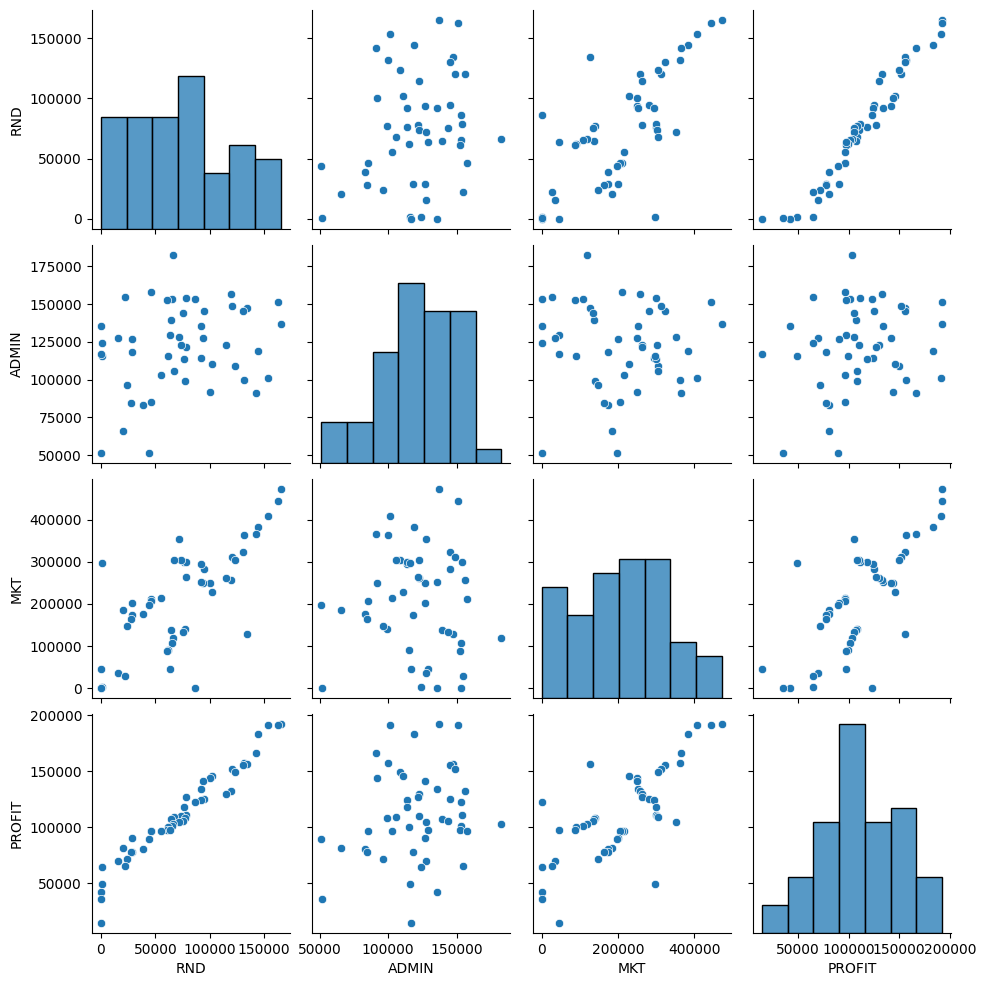

In [63]:
import seaborn as sns 
sns.pairplot(df)